In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import datanetAPI

In [2]:
reader = datanetAPI.DatanetAPI('./dataset/gnnet-ch21-dataset-train',
            [], [])

In [5]:
it = iter(reader)
n = 50
for i in range(n):
    sample = next(it)
    print(sample.maxAvgLambda)

1278.1
495.683
1162.44
1278.1
1020.52
495.683
1066.96
1162.44
1020.52
1066.96
650.136
559.65
1461.54
650.136
559.65
1868.99
1313.04
1461.54
744.032
1504.54
1868.99
1794.34
766.472
1313.04
744.032
1292.7
473.481
1775.07
1409.16
915.236
1704.55
979.296
1172.26
650.244
1254.47
1347.25
779.209
623.619
1880.16
1483.62
1762.73
1323.51
1620.4
1680.0
536.122
721.109
980.368
807.986
1262.31
472.054


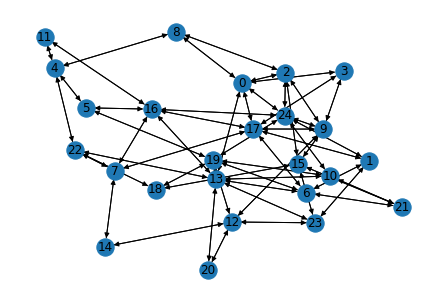

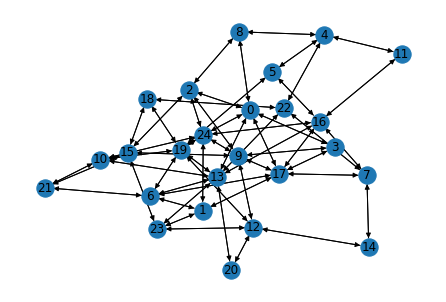

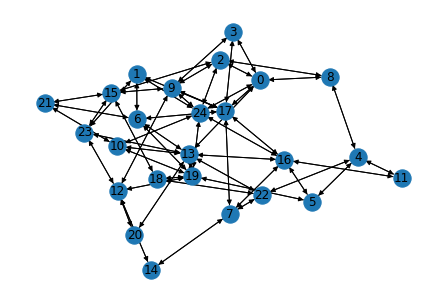

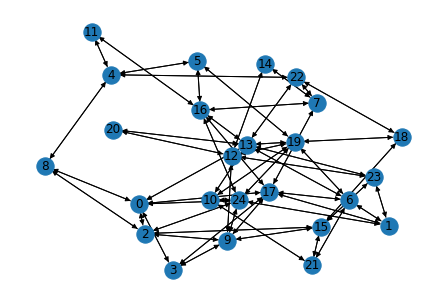

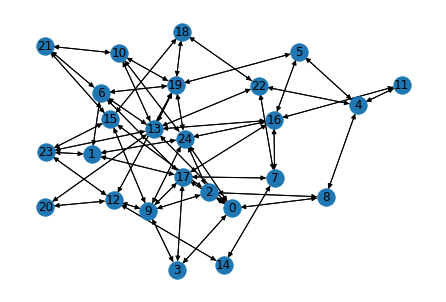

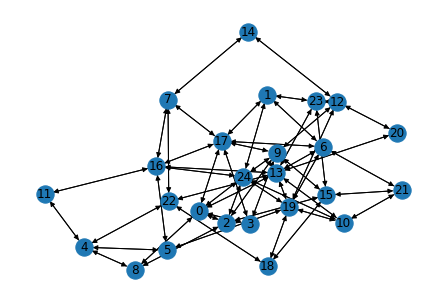

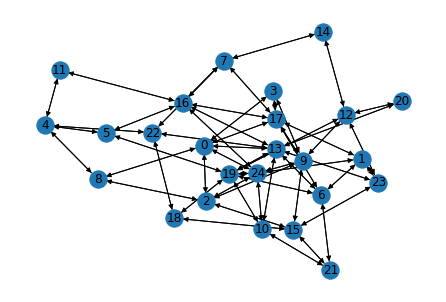

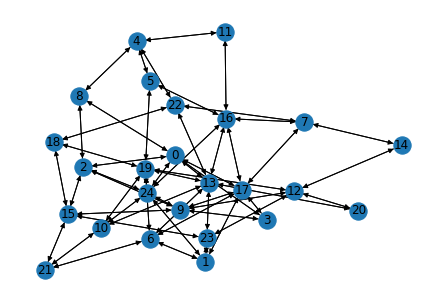

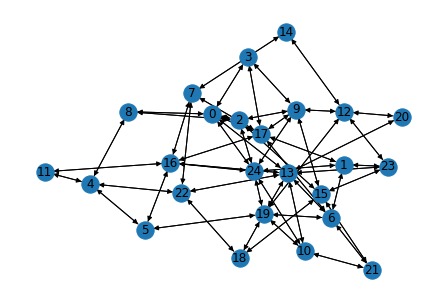

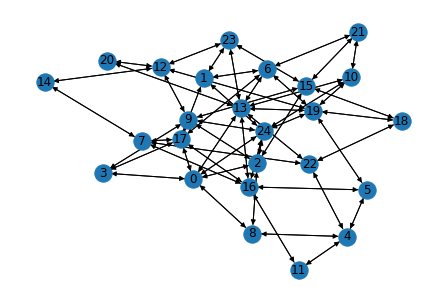

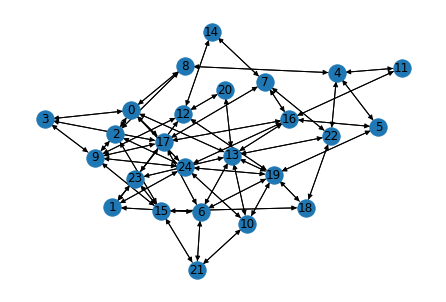

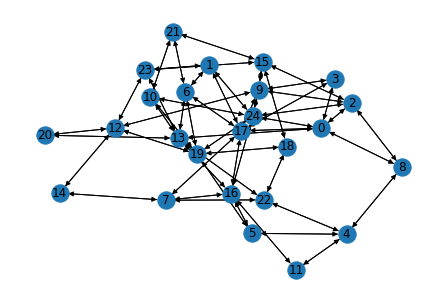

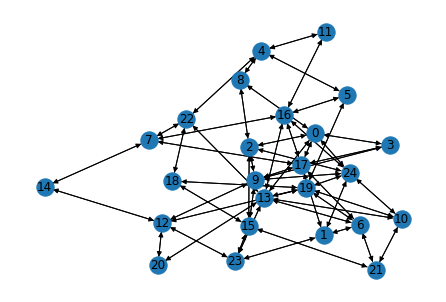

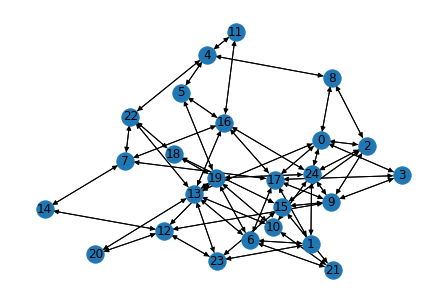

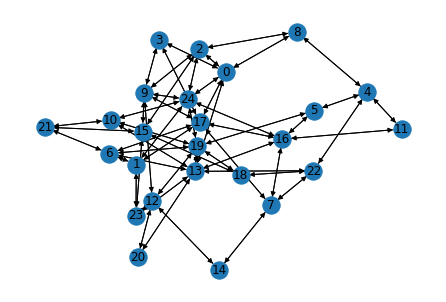

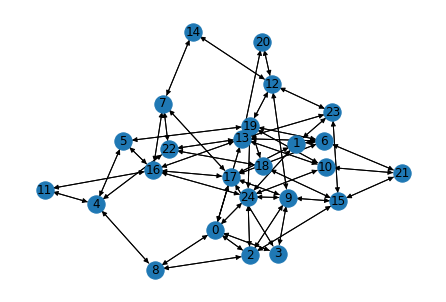

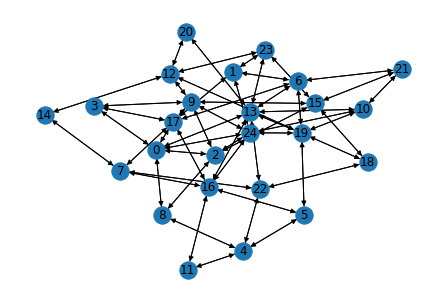

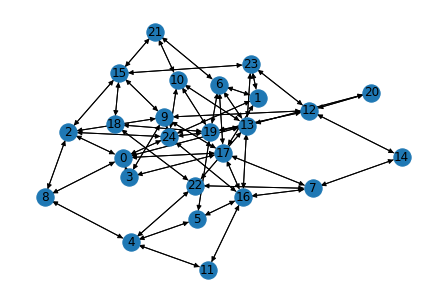

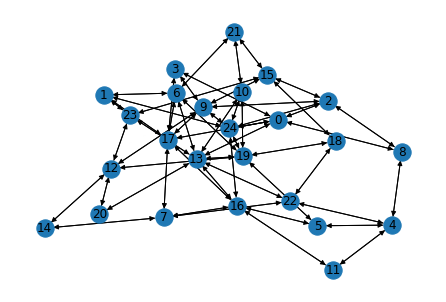

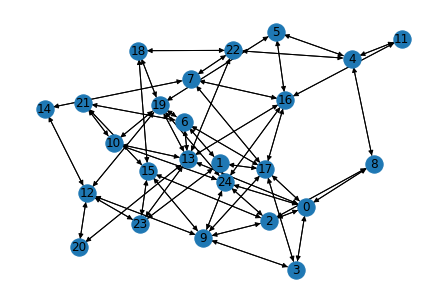

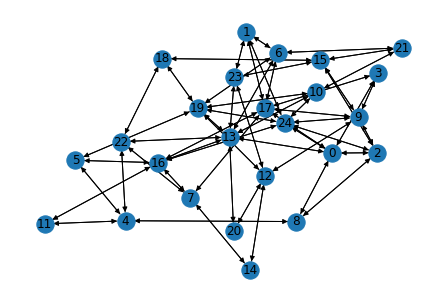

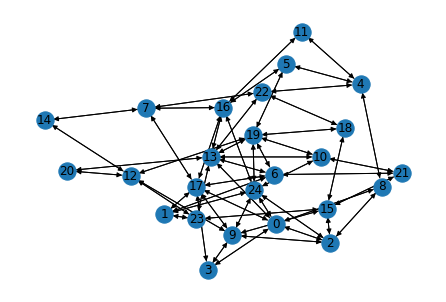

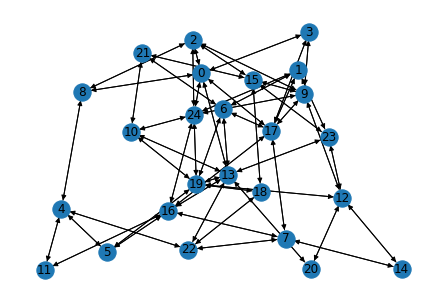

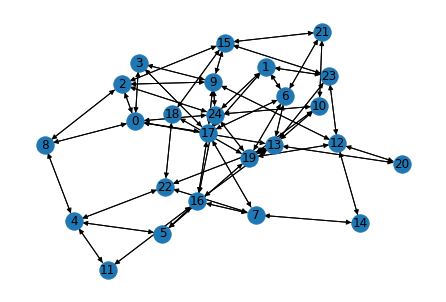

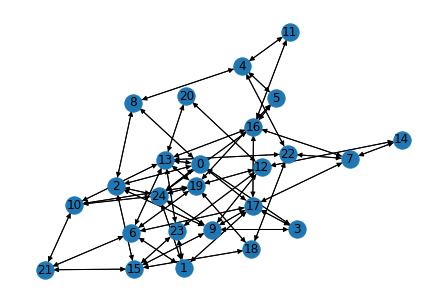

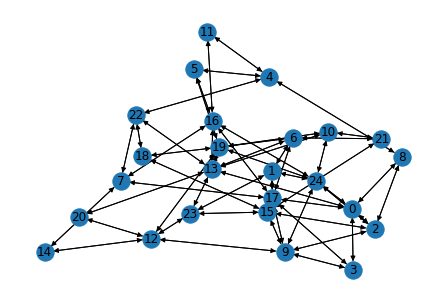

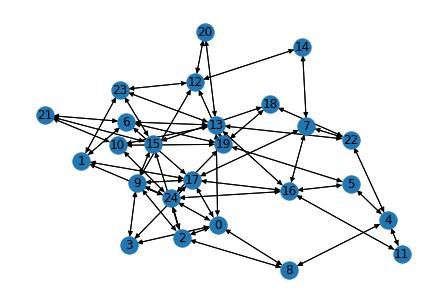

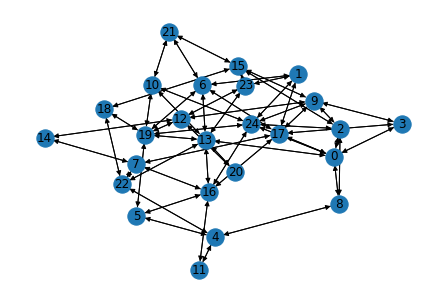

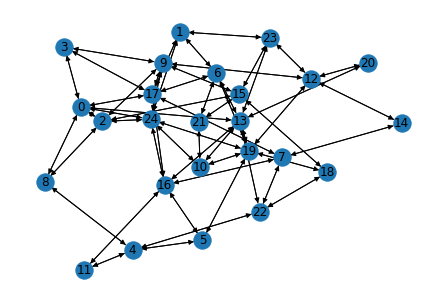

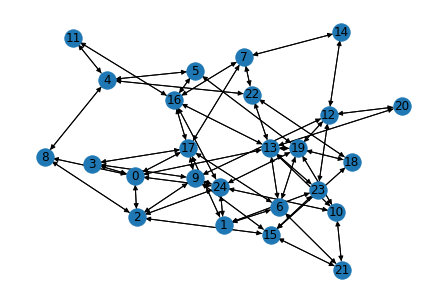

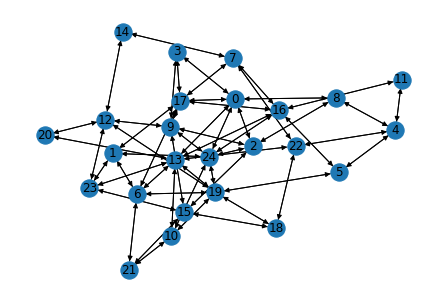

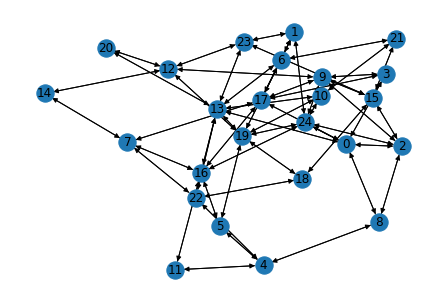

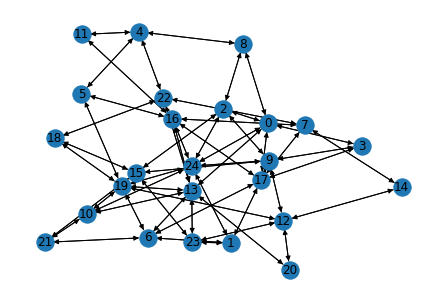

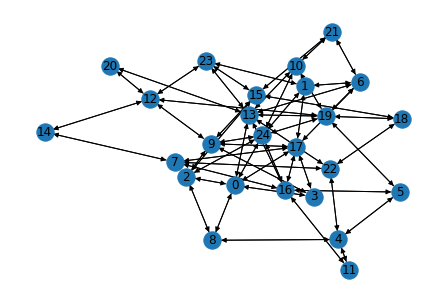

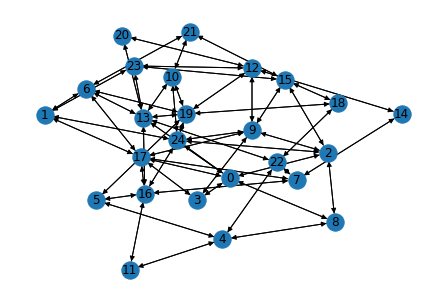

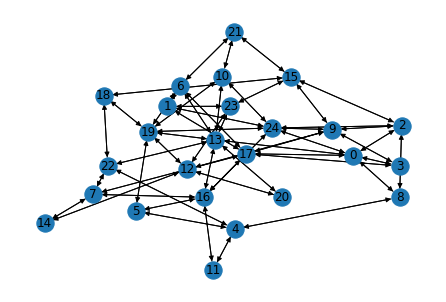

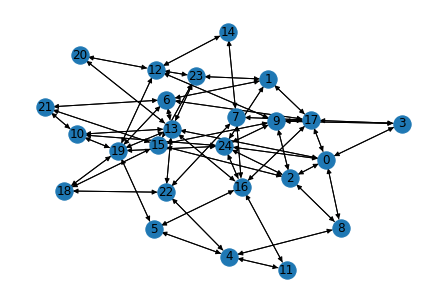

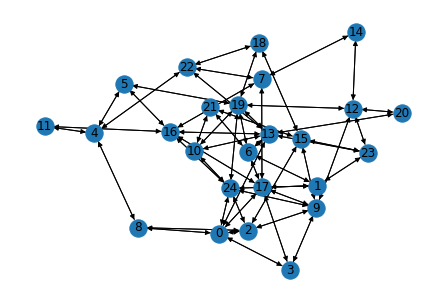

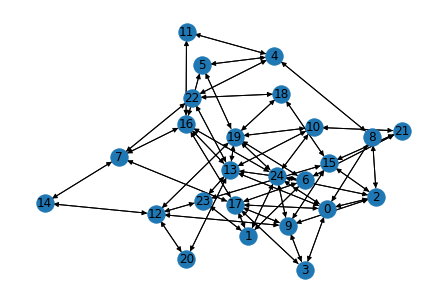

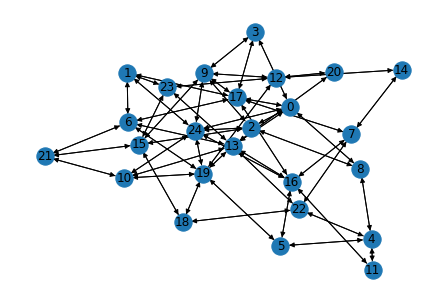

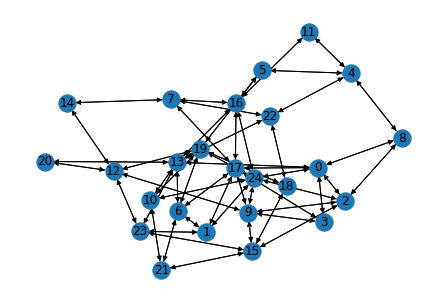

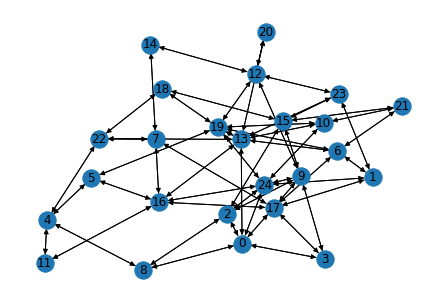

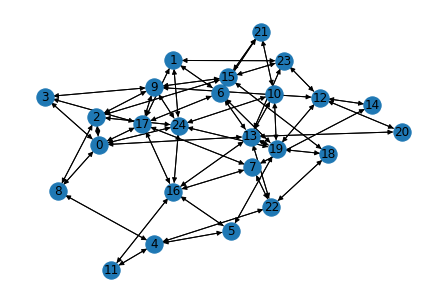

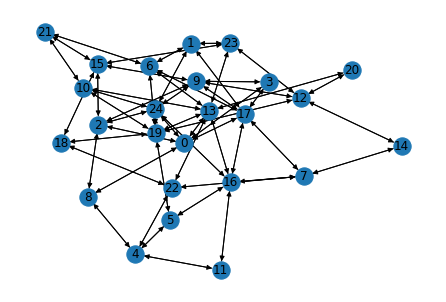

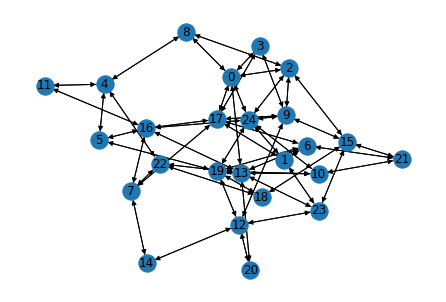

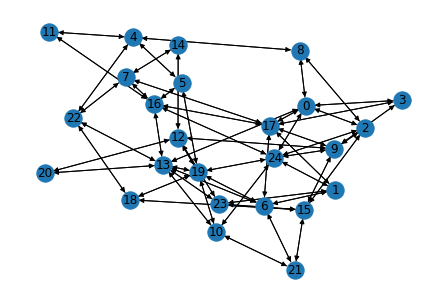

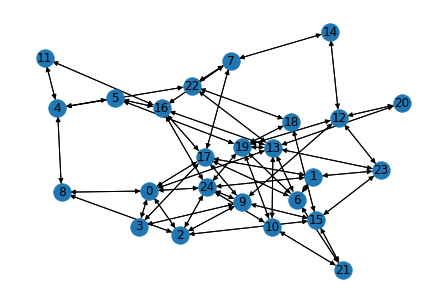

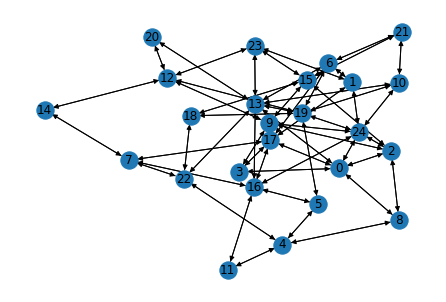

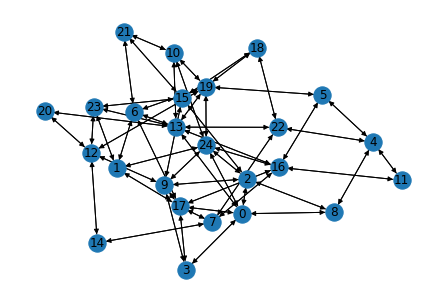

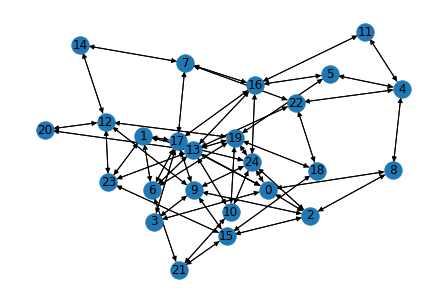

In [6]:
#physical topologies
for i in range(n):
    sample = next(it)
    G = sample.topology_object
    nx.draw(G, with_labels=True)
    plt.show()